In [2]:
import math
from sklearn.cluster import KMeans
from random import randint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def distance(point1, point2):
    return math.sqrt((point2[0]-point1[0])*(point2[0]-point1[0]) + (point2[1]-point1[1])*(point2[1]-point1[1]))

In [4]:
def set_label(point, clusters, labels):
    distances_to_cluster = []
    for c in clusters:
        dis = distance(point,c)
        distances_to_cluster.append(dis)
    min_distance = min(distances_to_cluster)
    label = distances_to_cluster.index(min_distance)
    labels.append(label)

    return labels

In [5]:
BLACK  = '#000000'

COLORS = np.array(["red","green","blue","yellow","pink","orange","purple","beige","brown","gray","cyan","magenta"])
labels = []

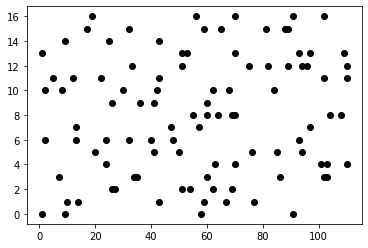

In [6]:
points = []
for i in range(100):
    x_random = randint(0,110)
    y_random = randint(0,16)
    points.append([x_random, y_random])
    plt.scatter(x_random, y_random, c = BLACK)

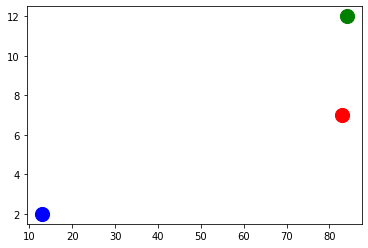

In [7]:
# K = int(input("Enter number cluster:"))
K = 3
clusters = []
for i in range(K):
    x_cluster = randint(0,110)
    y_cluster = randint(0,16)
    clusters.append([x_cluster,y_cluster])
    plt.scatter(x_cluster, y_cluster, c = COLORS[i], s = 200)

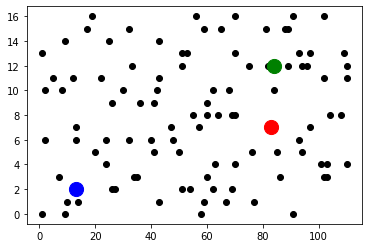

In [8]:
def draw_points_black():
    for i in range(len(points)):
        plt.scatter(points[i][0], points[i][1], c = BLACK)
def draw_clusters():  
    for j in range(len(clusters)):
        plt.scatter(clusters[j][0], clusters[j][1], c = COLORS[j], s = 200)
draw_points_black()
draw_clusters()

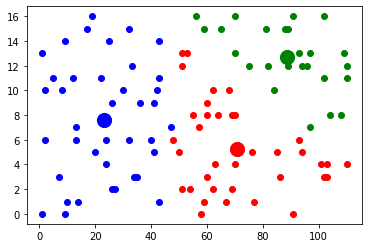

In [9]:
#Codeding
for p in points:
    labels = set_label(p, clusters, labels)
for i in range(K):
    sum_x = 0
    sum_y = 0
    count = 0
    for j in range(len(points)):
        if labels[j] == i:
            sum_x += points[j][0]
            sum_y += points[j][1]
            count += 1
    if count != 0:
        new_cluster_x = sum_x/count
        new_cluster_y = sum_y/count
        clusters[i] = [new_cluster_x,new_cluster_y]

draw_clusters()
for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c = COLORS[labels[i]])

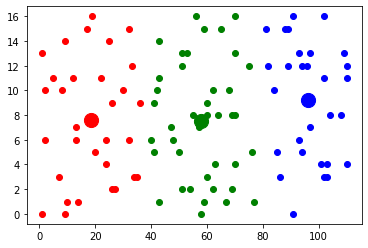

In [10]:
#Library
kmeans   = KMeans(n_clusters=K).fit(points)
clusters = kmeans.cluster_centers_
labels   = kmeans.labels_
draw_clusters()
for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c = COLORS[labels[i]])

[//]: # "Your comment in here."